In [8]:
# %%bash

# HIC_PATH="/media/jordan990301/Samsung_T5/HiC_Datasets/Rao_2014/GM12878/MAPQGE30/GSE63525_GM12878_insitu_primary_replicate_combined_30.hic"
# OUTPUT_PATH="/home/jordan990301/PCA_Experiments/outputs/Compare_EV1_Corr/GM12878_Chr1_100Kb"
# JUICER_TOOLS_PATH="/home/jordan990301/PCA_Experiments/juicer/juicer_tools.jar"

# java -jar $JUICER_TOOLS_PATH pearsons KR $HIC_PATH 1 BP 100000 $OUTPUT_PATH/pearson_matrix.txt -p
# java -jar $JUICER_TOOLS_PATH eigenvector KR $HIC_PATH 1 BP 100000 $OUTPUT_PATH/eigenvector.txt -p

In [9]:
import numpy as np
import pandas as pd

In [10]:
hic_path = "/media/jordan990301/Samsung_T5/HiC_Datasets/Rao_2014/GM12878/MAPQGE30/GSE63525_GM12878_insitu_primary_replicate_combined_30.hic"
output_path = "/home/jordan990301/PCA_Experiments/outputs/Compare_EV1_Corr/GM12878_Chr1_100Kb"
chrom_name_x = "1"
chrom_name_y = "1"
chrom_type = "BP"
norm = "KR"
resolution = 100000

In [11]:
pearson_df = pd.read_table(f"/home/jordan990301/PCA_Experiments/outputs/Compare_EV1_Corr/GM12878_Chr1_100Kb/pearson_matrix.txt", header=None, sep=" ")
pearson_df.pop(pearson_df.columns[-1])

pearson_df = pearson_df.dropna(axis=0, how="all").reset_index(drop=True)
pearson_df = pearson_df.dropna(axis=1, how="all")

numpy_pearson_df = pearson_df.values
pearson_df = pd.DataFrame(numpy_pearson_df)

np.savetxt(f'{output_path}/Pearson_Entry1_Dropna.txt', pearson_df[0].values, fmt='%1.4e')

In [12]:
EV1_df = pd.read_table(f"/home/jordan990301/PCA_Experiments/outputs/Compare_EV1_Corr/GM12878_Chr1_100Kb/eigenvector.txt", header=None, sep=" ")

EV1_df = EV1_df.dropna(axis=0, how="all").reset_index(drop=True)
EV1_df = EV1_df.dropna(axis=1, how="all")

np.savetxt(f'{output_path}/EV1_Dropna.txt', EV1_df[0].values, fmt='%1.4e')

numpy_pearson_df = EV1_df.values
EV1_df = pd.DataFrame(numpy_pearson_df)

In [13]:
Pearson_Entry1_Pos = pearson_df[0] > 0
EV1_Pos = EV1_df > 0

Pearson_Entry1_Pos = Pearson_Entry1_Pos.to_numpy()
EV1_Pos = EV1_Pos.to_numpy()

Difference_Count = 0
for i in range(Pearson_Entry1_Pos.shape[0]):
    if(Pearson_Entry1_Pos[i] != EV1_Pos[i]):
        Difference_Count += 1


print("Pearson_Entry1_Pos -> Entry Num:")
print(Pearson_Entry1_Pos.shape[0])

print("EV1_Pos -> Entry Num:")
print(EV1_Pos.shape[0])

print("Difference_Count:")
print(Difference_Count)

Pearson_Entry1_Pos -> Entry Num:
2276
EV1_Pos -> Entry Num:
2276
Difference_Count:
196


#### Visualization

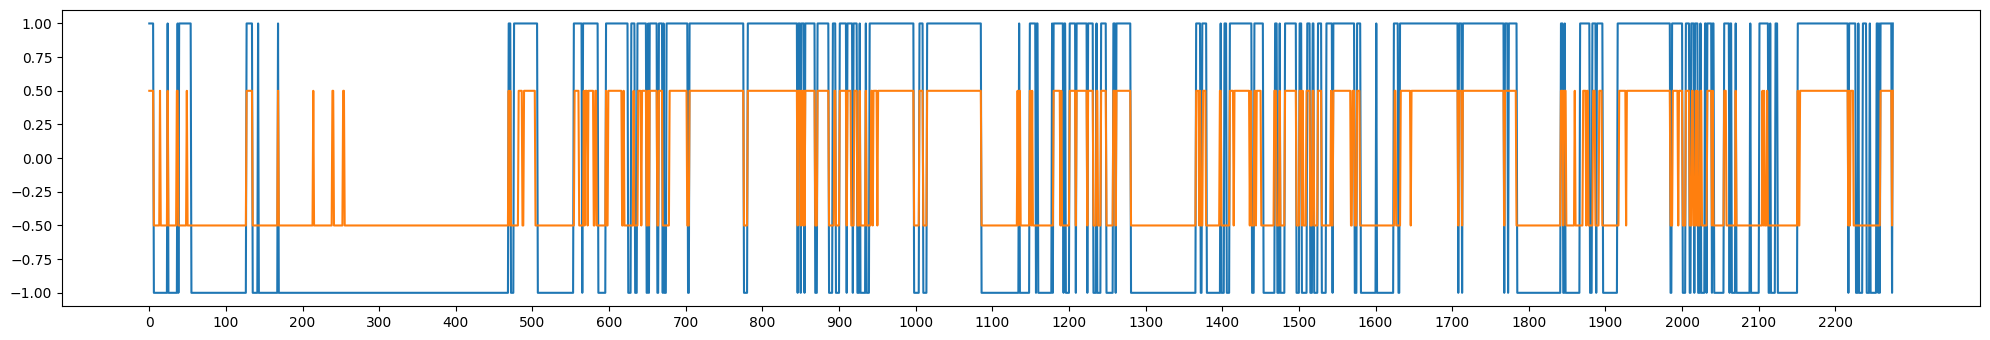

In [14]:
from matplotlib import pyplot as plt

plt.xticks(np.arange(0, Pearson_Entry1_Pos.shape[0], 100)) 
plt.rcParams["figure.figsize"] = [20, 3.50]
plt.rcParams["figure.autolayout"] = True

EV1_Viz = []

for i in EV1_Pos:
    if i:
        EV1_Viz.append(1)
    else:
        EV1_Viz.append(-1)

plt.plot(EV1_Viz)

Pearson_Entry1_Viz = []

for i in Pearson_Entry1_Pos:
    if i:
        Pearson_Entry1_Viz.append(0.5)
    else:
        Pearson_Entry1_Viz.append(-0.5)

plt.plot(Pearson_Entry1_Viz)